## Aluno: Airton Silva Monteiro

In [46]:
#Importando Dependências
import numpy as np
import matplotlib.pyplot as plt

Warm-Up Exercise

A simple function to return a 5x5 identity matrix.

In [47]:
def warmUpExercise():
    '''TODO:implement this part of code'''
    #Resolução:
    I = np.eye(5)
    return I

# Test warmUpExercise
print("Running warmUpExercise...")
print("5x5 Identity Matrix:")
print(warmUpExercise())

Running warmUpExercise...
5x5 Identity Matrix:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


Loading and plotting data

Load and visualize data from ex1data1.txt

In [48]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',') #Foi criado uma pasta data dentro do folder da Atividade
X = data[:, 0]
y = data[:, 1]
m = len(y)

# print(f'Population size in 10,000s=\n{X}')
# print('------------------------------------------')
# print(f'Profit in $10,000s=\n{y}')
# print('------------------------------------------')
# print(f'Number of training examples=\n{m}')

# ones_colums = np.ones((m,1))
# X_feature_colum = X.reshape((m, 1))
# X_design = np.concatenate((ones_colums, X_feature_colum), axis = 1)

# print(X_design[:5])
# print(y[:5])


Plotting data

Function to plot the data points.

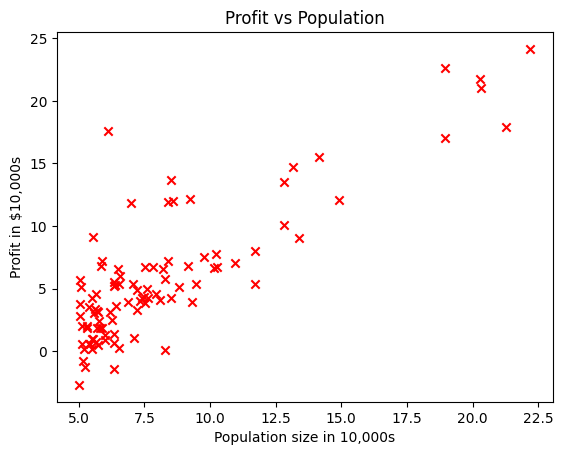

In [49]:
def plotData(X, y):
    plt.scatter(X, y, marker='x', c='r')
    plt.xlabel('Population size in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.title('Profit vs Population')
    plt.show()

# Plot data
plotData(X, y)

Cost function and gradient descent

Implementing cost function and gradient descent.

In [50]:
# Compute cost
def computeCost(X, y, theta):
    #TODO: implement this part of code
    #Resolução:
    m_func = len(y)
    h_func = np.dot(X, theta)
    square_error = (h_func-y)**2
    cost = (1/(2*m_func))*np.sum(square_error)
    return cost

# Gradient descent
def gradientDescent(X, y, theta, alpha, iterations):
    #TODO: implement this part of code
    #Resolução:
    m_grad = len(y)
    J_hist = np.zeros(iterations)

    for iter_num in range(iterations):
        h = np.dot(X, theta)
        erro = h - y
        grad = (1/m_grad)*np.dot(X.T, erro)
        theta = theta - (alpha*grad)
        J_hist[iter_num] = computeCost(X, y, theta)
    return theta, J_hist

**Prepare data for linear regression**

In [51]:
X_with_intercept = np.column_stack((np.ones(m), X))
theta = np.zeros(2)  # Initialize fitting parameters
iterations = 1500
alpha = 0.01

In [52]:
# Test cost function
print("\nTesting the cost function...")
J = computeCost(X_with_intercept, y, theta)
print(f"With theta = [0 ; 0]\nCost computed = {J}")
print("Expected cost value (approx) 32.07")


Testing the cost function...
With theta = [0 ; 0]
Cost computed = 32.072733877455676
Expected cost value (approx) 32.07


In [53]:
J = computeCost(X_with_intercept, y, np.array([-1, 2]))
print(f"With theta = [-1 ; 2]\nCost computed = {J}")
print("Expected cost value (approx) 54.24")

With theta = [-1 ; 2]
Cost computed = 54.24245508201238
Expected cost value (approx) 54.24


In [54]:
# Run gradient descent
theta_final, J_history = gradientDescent(X_with_intercept, y, theta, alpha, iterations)
print("Theta found by gradient descent:")
print(theta_final)
print("Expected theta values (approx): [-3.6303, 1.1664]")

Theta found by gradient descent:
[-3.63029144  1.16636235]
Expected theta values (approx): [-3.6303, 1.1664]


**Plot linear fit**

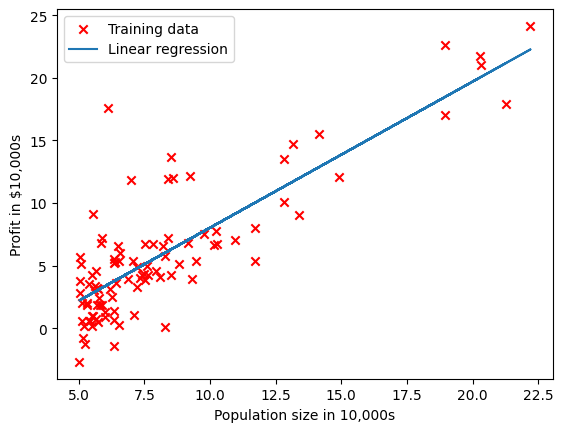

In [57]:
plt.scatter(X, y, marker='x', c='r', label='Training data')
plt.plot(X, X_with_intercept @ theta_final, '-', label='Linear regression')
plt.xlabel('Population size in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()
plt.show()

**Predict values**

In [59]:
predict1 = np.array([1, 3.5]) @ theta_final
predict2 = np.array([1, 7]) @ theta_final
print(f"For population = 35,000, we predict a profit of {predict1 * 10000}")
print(f"For population = 70,000, we predict a profit of {predict2 * 10000}")

For population = 35,000, we predict a profit of 4519.767867701768
For population = 70,000, we predict a profit of 45342.45012944714


**Visualizing $J(\theta_{0}, \theta_{1})$**

Visualize the cost function to see how it changes with different values of theta.

In [60]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

In [61]:
# Compute cost for each combination of theta0 and theta1
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        t = np.array([theta0, theta1])
        J_vals[i, j] = computeCost(X_with_intercept, y, t)

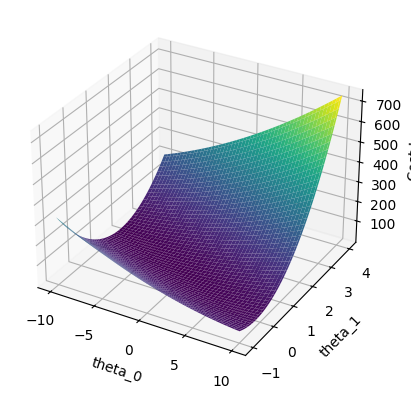

In [62]:
# Surface plot
J_vals = J_vals.T  # Transpose for correct orientation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(T0, T1, J_vals, cmap='viridis')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost J')
plt.show()

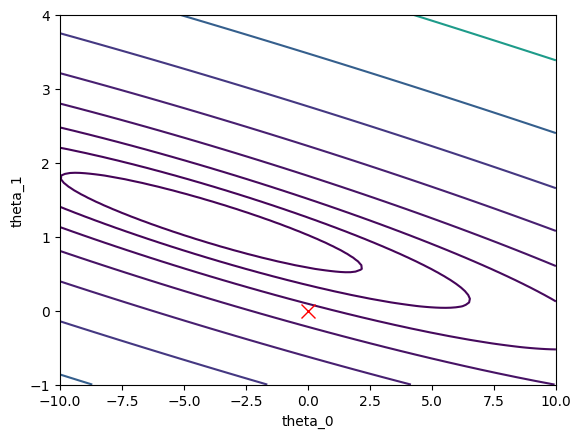

In [63]:
# Contour plot
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20), cmap='viridis')
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)
plt.show()

## Initialization
## Linear regression with multiple variables for predicting house prices.

In [64]:
#Dependências já foram importadas

In [65]:
# Load data
data = np.loadtxt('data/ex1data2.txt', delimiter=',')
X = data[:, :2]  # Features: size and number of bedrooms
y = data[:, 2]   # Target: price
m = len(y)       # Number of training examples

# Display first 10 examples of the dataset
print("First 10 examples from the dataset:")
for i in range(10):
    print(f"x = [{X[i, 0]:.0f}, {X[i, 1]:.0f}], y = {y[i]:.0f}")

First 10 examples from the dataset:
x = [2104, 3], y = 399900
x = [1600, 3], y = 329900
x = [2400, 3], y = 369000
x = [1416, 2], y = 232000
x = [3000, 4], y = 539900
x = [1985, 4], y = 299900
x = [1534, 3], y = 314900
x = [1427, 3], y = 198999
x = [1380, 3], y = 212000
x = [1494, 3], y = 242500


In [66]:
# Normalize features
def featureNormalize(X):
    #TODO: implement this part of code
    #Resolução
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = X.copy()
    is_1d = False
    if X.ndim == 1:
        is_1d = True
        if sigma == 0:
             X_norm = np.zeros(X.shape)
        else:
            X_norm = (X - mu) / sigma
    else:
        for i in range(X.shape[1]):
            if sigma[i] == 0:
                X_norm[:, i] = 0 
            else:
                X_norm[:, i] = (X[:, i] - mu[i]) / sigma[i]
    if is_1d and X_norm.ndim > 1 : 
         X_norm = X_norm.flatten()
         
    return X_norm, mu, sigma

print("Normalizing Features...")
X, mu, sigma = featureNormalize(X)

Normalizing Features...


In [67]:
X = np.column_stack((np.ones(m), X))

**Gradient Descent**

**Implementing gradient descent for multiple variables.**

In [73]:
# Compute cost
def computeCostMulti(X, y, theta):
    #TODO: implement this part of code
    #Resolução:
    m = y.shape[0]
    _theta = theta.copy()
    if _theta.ndim == 1:
        _theta = _theta.reshape(-1, 1)
    _y = y.copy()
    if _y.ndim == 1:
        _y = _y.reshape(-1, 1)

    h = np.dot(X, _theta)
    error = h - _y
    sum_squared_errors_matrix = np.dot(error.T, error)
    J = (1 / (2 * m)) * sum_squared_errors_matrix[0, 0]
    return J

In [77]:
# Gradient descent
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    #TODO: implement this part of code
    #Resolução:
    m = y.shape[0]
    J_history = np.zeros(num_iters)
    original_theta = theta.shape
    theta_current_1d = theta.copy().flatten()
    y_1d = y.copy().flatten()
    for i in range(num_iters):
        predictions = np.dot(X, theta_current_1d)
        error = predictions - y_1d
        gradient = (1/m) * np.dot(X.T, error)
        theta_current_1d = theta_current_1d - (alpha * gradient)
        J_history[i] = computeCostMulti(X, y_1d, theta_current_1d)
    theta_final = theta_current_1d.reshape(original_theta)
    return theta_final, J_history

In [84]:
# Running gradient descent
alpha = 0.01
num_iters = 800

theta = np.zeros(X.shape[1])  # Initialize fitting parameters
print("Running gradient descent...")

theta_opt, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

Running gradient descent...


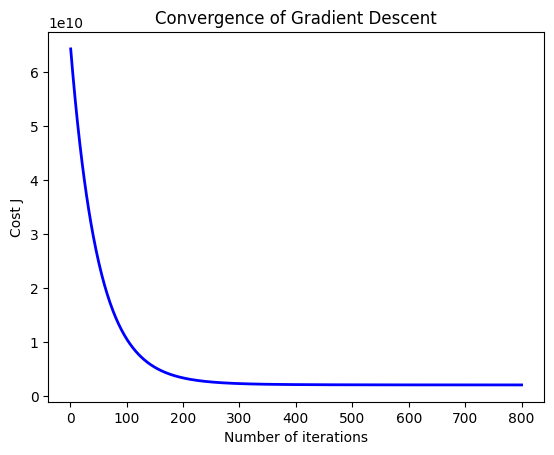

Theta computed from gradient descent:
[340302.97100295 107744.19899198  -4875.11193358]


In [85]:
# Plot the convergence graph
plt.plot(range(1, len(J_history) + 1), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

print("Theta computed from gradient descent:")
print(theta_opt)

In [86]:
# Predicting price for a house with 1650 sq-ft and 3 bedrooms
normalized_features = (np.array([1650, 3]) - mu) / sigma
normalized_features = np.insert(normalized_features, 0, 1)  # Add intercept term
price = normalized_features @ theta

print(f"Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $ {price:.2f}")
print(f'Expected price (approx): 289314.62')

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $ 0.00
Expected price (approx): 289314.62


**Optional: Selecting learning rates**

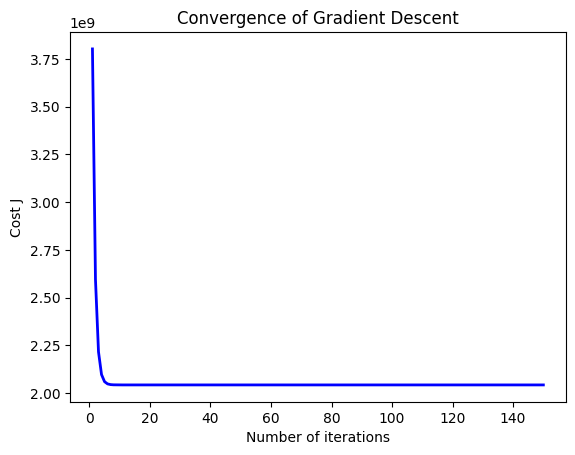

Theta computed from gradient descent:
[340412.65957447 109447.79646964  -6578.35485416]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $ 0.00


In [92]:
# Running gradient descent
alpha = 1.
num_iters = 150

theta = np.zeros(X.shape[1])  # Initialize fitting parameters

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# Plot the convergence graph
plt.plot(range(1, len(J_history) + 1), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

print("Theta computed from gradient descent:")
print(theta)
print(f"Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $ {price:.2f}")

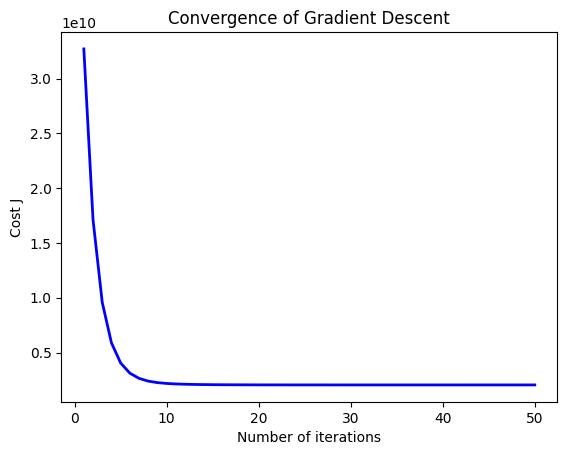

Theta computed from gradient descent:
[340412.65345227 109398.90129361  -6529.45967813]


In [ ]:
# Running gradient descent
alpha = 0.03
num_iters = 50

theta = np.zeros(X.shape[1])  # Initialize fitting parameters

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# Plot the convergence graph
plt.plot(range(1, len(J_history) + 1), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

print("Theta computed from gradient descent:")
print(theta)

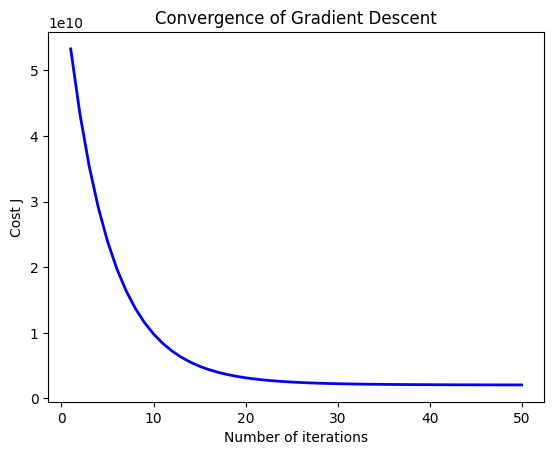

Theta computed from gradient descent:
[338658.2492493  103322.82942954   -474.74249522]


In [ ]:
# Running gradient descent
alpha = 0.2
num_iters = 50

theta = np.zeros(X.shape[1])  # Initialize fitting parameters

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# Plot the convergence graph
plt.plot(range(1, len(J_history) + 1), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

print("Theta computed from gradient descent:")
print(theta)

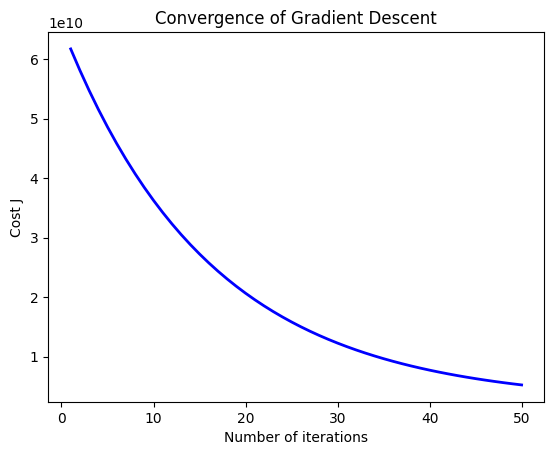

Theta computed from gradient descent:
[266180.44519135  74914.10261664  18590.28082278]


In [ ]:
# Running gradient descent
alpha = 0.04
num_iters = 50

theta = np.zeros(X.shape[1])  # Initialize fitting parameters

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# Plot the convergence graph
plt.plot(range(1, len(J_history) + 1), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

print("Theta computed from gradient descent:")
print(theta)

## Normal Equations
## Solving the linear regression problem using normal equations.

In [97]:

# Normal equations
def normalEqn(X, y):
    #TODO: implement this part of code
    #Resolução
    X_T = np.dot(X.T, X)
    X_T_inv = np.linalg.pinv(X_T)
    XTy = np.dot(X.T, y)
    theta = np.dot(X_T_inv, XTy)

    return theta

print("Solving with normal equations...")
data = np.loadtxt('data/ex1data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

# Add intercept term to X
X = np.column_stack((np.ones(len(y)), X))

theta = normalEqn(X, y)

print("Theta computed from the normal equations:")
print(theta)

Solving with normal equations...
Theta computed from the normal equations:
[89597.90954361   139.21067402 -8738.01911255]


In [98]:
# Predicting price for a house with 1650 sq-ft and 3 bedrooms using normal equations
price = np.array([1, 1650, 3]) @ theta
print(f"Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $ {price:.2f}")
print(f'Expected price (approx): 293081.46')

Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $ 293081.46
Expected price (approx): 293081.46
